In [1]:
#pip install quandl

In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
import quandl
import numpy as np
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api
import string
import spacy
import requests
from csv import writer
from bs4 import BeautifulSoup
import seaborn as sns
import statsmodels.formula.api as sm
import sklearn.linear_model
import sklearn.metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
data=pd.read_excel("Brent.xls")
data

,Date,SpotPrice
0,2016-10-03,48.61
1,2016-10-04,48.81
2,2016-10-05,49.57
3,2016-10-06,50.14
4,2016-10-07,50.49
...,...,...
1304,2021-11-16,82.85
1305,2021-11-17,80.67
1306,2021-11-18,82.45
1307,2021-11-19,80.24


In [4]:
data.set_index('Date',inplace=True)

In [5]:
data

,SpotPrice
Date,
2016-10-03,48.61
2016-10-04,48.81
2016-10-05,49.57
2016-10-06,50.14
2016-10-07,50.49
...,...
2021-11-16,82.85
2021-11-17,80.67
2021-11-18,82.45


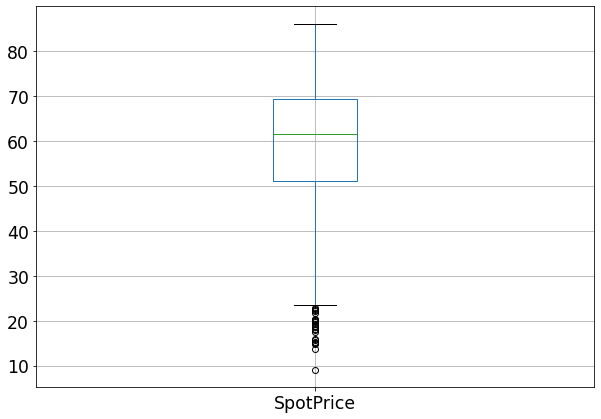

In [6]:
#Boxplot showing outliers
data.boxplot(column='SpotPrice')
plt.show()

<AxesSubplot:ylabel='Density'>

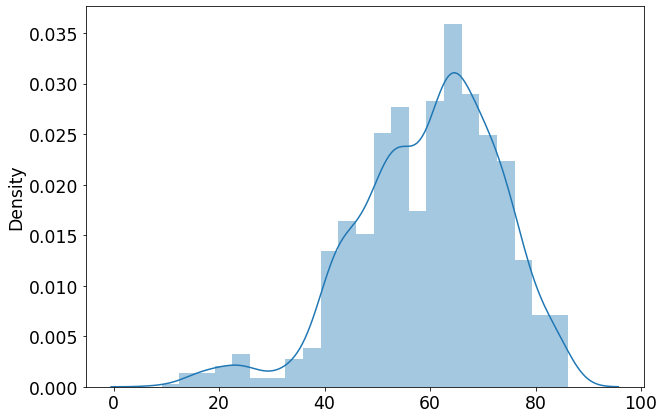

In [7]:
#Left Skewed data
sns.distplot(data)

In [8]:
from scipy.stats import boxcox 

In [9]:
for i in data:
    data[i],lmbda=boxcox(data[i], lmbda=None)

In [10]:
data

,SpotPrice
Date,
2016-10-03,553.397368
2016-10-04,557.447404
2016-10-05,572.954788
2016-10-06,584.706869
2016-10-07,591.974553
...,...
2021-11-16,1426.055451
2021-11-17,1360.137800
2021-11-18,1413.858611


<AxesSubplot:ylabel='Density'>

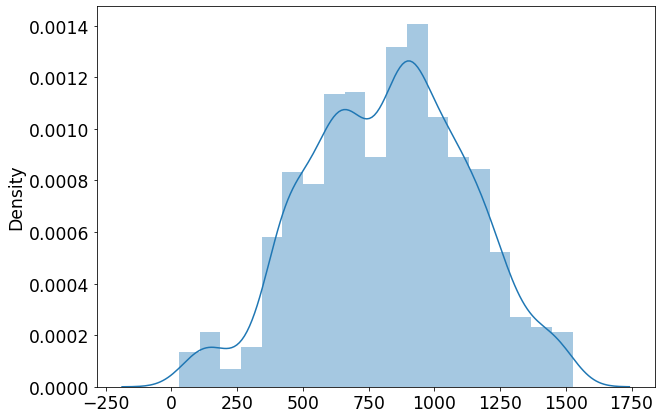

In [11]:
sns.distplot(data)

<AxesSubplot:xlabel='SpotPrice'>

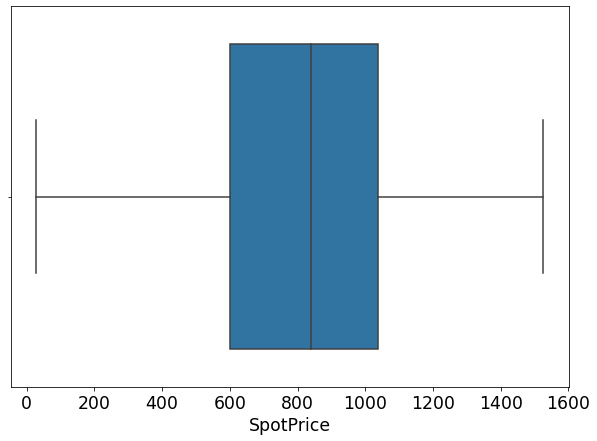

In [12]:
sns.boxplot(data['SpotPrice'])

# New Section

In [13]:
from tensorflow.keras import Sequential

In [14]:
def spot_price(data,window_size=5):
    data_=data.to_numpy()
    x=[]
    y=[]
    
    for i in range(len(data)-window_size): #last 5 rows are neglected since the window size is 5
        row=[price for price in data_[i:i+window_size]]
        x.append(row)
    #print(x)   
        label=data_[i+window_size]
        y.append(label)
        
    return np.array(x),np.array(y)

In [15]:
x,y=spot_price(data)
x.shape,y.shape

((1304, 5, 1), (1304, 1))

In [16]:
x_train=x[:1083]
y_train=y[:1083]
x_test=x[226:]
y_test=y[226:]

In [17]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1083, 5, 1), (1083, 1), (1078, 5, 1), (1078, 1))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Flatten

In [19]:
model=Sequential()
#mode.add(InputLayer(Input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='linear'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 51,321
Trainable params: 51,321
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='mean_absolute_percentage_error',optimizer='adam')

In [22]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=20,batch_size=10,verbose=1)

Epoch 1/20
109/109 [==============================] - 6s 17ms/step - loss: 98.4534 - val_loss: 97.0971
Epoch 2/20
109/109 [==============================] - 1s 9ms/step - loss: 95.1910 - val_loss: 94.0436
Epoch 3/20
109/109 [==============================] - 1s 9ms/step - loss: 91.3572 - val_loss: 90.0698
Epoch 4/20
109/109 [==============================] - 1s 9ms/step - loss: 86.8163 - val_loss: 85.9869
Epoch 5/20
109/109 [==============================] - 1s 10ms/step - loss: 82.3221 - val_loss: 82.0607
Epoch 6/20
109/109 [==============================] - 1s 9ms/step - loss: 77.9152 - val_loss: 78.2718
Epoch 7/20
109/109 [==============================] - 1s 9ms/step - loss: 73.6704 - val_loss: 74.6204
Epoch 8/20
109/109 [==============================] - 1s 10ms/step - loss: 69.4495 - val_loss: 70.9941
Epoch 9/20
109/109 [==============================] - 1s 9ms/step - loss: 65.0247 - val_loss: 67.2583
Epoch 10/20
109/109 [==============================] - 1s 9ms/step - loss: 60.5

In [23]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
y_pred_test

array([[256.0222 ],
       [256.0222 ],
       [256.0222 ],
       ...,
       [256.02222],
       [256.0222 ],
       [256.0222 ]], dtype=float32)

In [24]:
test_data_result=pd.DataFrame(data={'actual_price_test':y_test.flatten(),'predicted_price_test':y_pred_test.flatten()})

In [26]:
lstm_MAPE=mean_absolute_percentage_error(test_data_result['actual_price_test'],test_data_result['predicted_price_test'])*100 
lstm_MAPE

70.17022637069537